In [13]:
import pandas as pd 
import numpy as np
df=pd.read_csv("F:/Downloads/internData.csv")

# Data Preprocessing 
Check Null , Data Type , See The correct Form of the data if there any white space for example or not

Check And Handel The Outliers Using (EX : IQR OR Z SCORE 


In [14]:
# Check for null values
print(df.isnull().sum())

# Check data types
print(df.dtypes)

# Check for white spaces in string columns
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].str.strip()



Booking_ID                  0
number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
dtype: int64
Booking_ID                   object
number of adults              int64
number of children            int64
number of weekend nights      int64
number of week nights         int64
type of meal                 object
car parking space             int64
room type                    object
lead time                     int64
market segment type          object
repeated                      int64
P-C                           int64
P-not-C                       int64
average p

In [10]:
# Confirm changes
print(df.head())


  Booking_ID  number of adults  number of children  number of weekend nights  \
0   INN00001                 1                   1                         2   
1   INN00002                 1                   0                         1   
2   INN00003                 2                   1                         1   
3   INN00004                 1                   0                         0   
4   INN00005                 1                   0                         1   

   number of week nights  type of meal  car parking space    room type  \
0                      5   Meal Plan 1                  0  Room_Type 1   
1                      3  Not Selected                  0  Room_Type 1   
2                      3   Meal Plan 1                  0  Room_Type 1   
3                      2   Meal Plan 1                  0  Room_Type 1   
4                      2  Not Selected                  0  Room_Type 1   

   lead time market segment type  repeated  P-C  P-not-C  average price   

In [15]:
# Selecting only numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Using IQR to detect outliers for numeric columns only
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Filtering out outliers
df_out = df[~((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

print("Original dataset shape:", df.shape)
print("Dataset shape after removing outliers:", df_out.shape)


Original dataset shape: (36285, 17)
Dataset shape after removing outliers: (20818, 17)


# Feature Engineering

In [17]:
# Convert date of reservation to datetime, handling errors
df['date of reservation'] = pd.to_datetime(df['date of reservation'], errors='coerce')

# Extract month from the date of reservation
df['reservation_month'] = df['date of reservation'].dt.month

# Drop rows where date conversion failed (NaT values)
df = df.dropna(subset=['date of reservation'])

# Confirm changes
print(df.head())


  Booking_ID  number of adults  number of children  number of weekend nights  \
0   INN00001                 1                   1                         2   
1   INN00002                 1                   0                         1   
2   INN00003                 2                   1                         1   
3   INN00004                 1                   0                         0   
4   INN00005                 1                   0                         1   

   number of week nights  type of meal  car parking space    room type  \
0                      5   Meal Plan 1                  0  Room_Type 1   
1                      3  Not Selected                  0  Room_Type 1   
2                      3   Meal Plan 1                  0  Room_Type 1   
3                      2   Meal Plan 1                  0  Room_Type 1   
4                      2  Not Selected                  0  Room_Type 1   

   lead time market segment type  repeated  P-C  P-not-C  average price   

# Train Test Split-Modeling And Accuracy Calculation 

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score


# One-hot encoding for categorical variables
df_out = pd.get_dummies(df_out, columns=['type of meal', 'room type', 'market segment type'])

# Label encoding for the target variable
le = LabelEncoder()
df_out['booking status'] = le.fit_transform(df_out['booking status'])

# 4. Train Test Split
X = df_out.drop(['booking status', 'Booking_ID', 'date of reservation'], axis=1)
y = df_out['booking status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Modeling and Accuracy Calculation
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict and calculate accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')


Accuracy: 0.8633525456292027


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Define a function to train and evaluate a model
def train_and_evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.4f}')



In [21]:
# Logistic Regression
print("Logistic Regression:")
log_reg = LogisticRegression(max_iter=1000, random_state=42)
train_and_evaluate_model(log_reg, X_train, X_test, y_train, y_test)



Logistic Regression:
Accuracy: 0.7978


In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Standardize the features (KNN is sensitive to feature scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ensure the data is in contiguous array format
X_train_contiguous = np.ascontiguousarray(X_train_scaled)
X_test_contiguous = np.ascontiguousarray(X_test_scaled)

# K-Nearest Neighbors (KNN)
print("K-Nearest Neighbors:")
knn = KNeighborsClassifier(n_neighbors=5)
train_and_evaluate_model(knn, X_train_contiguous, X_test_contiguous, y_train, y_test)


K-Nearest Neighbors:
Accuracy: 0.8280


In [23]:
# Support Vector Machine (SVM)
print("Support Vector Machine:")
svm = SVC(random_state=42)
train_and_evaluate_model(svm, X_train, X_test, y_train, y_test)



Support Vector Machine:
Accuracy: 0.7711


In [24]:
# Gradient Boosting
print("Gradient Boosting:")
gbc = GradientBoostingClassifier(random_state=42)
train_and_evaluate_model(gbc, X_train, X_test, y_train, y_test)


Gradient Boosting:
Accuracy: 0.8367


In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

# Linear Regression
print("Linear Regression:")
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred = np.round(linear_reg.predict(X_test))
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')


Linear Regression:
Accuracy: 0.7937


# Conclusion

Best model accuracy is RandomForest classifier with accuracy =86%

# Data Visualization

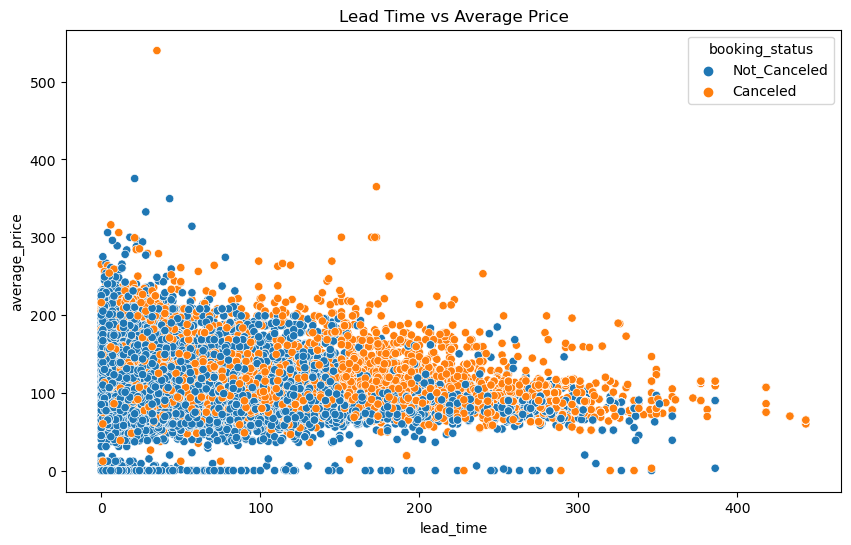

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Rename columns to ensure there are no spaces
df.rename(columns=lambda x: x.strip().replace(' ', '_').lower(), inplace=True)

# Scatter plot between lead time and average price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='lead_time', y='average_price', data=df, hue='booking_status')
plt.title('Lead Time vs Average Price')
plt.show()


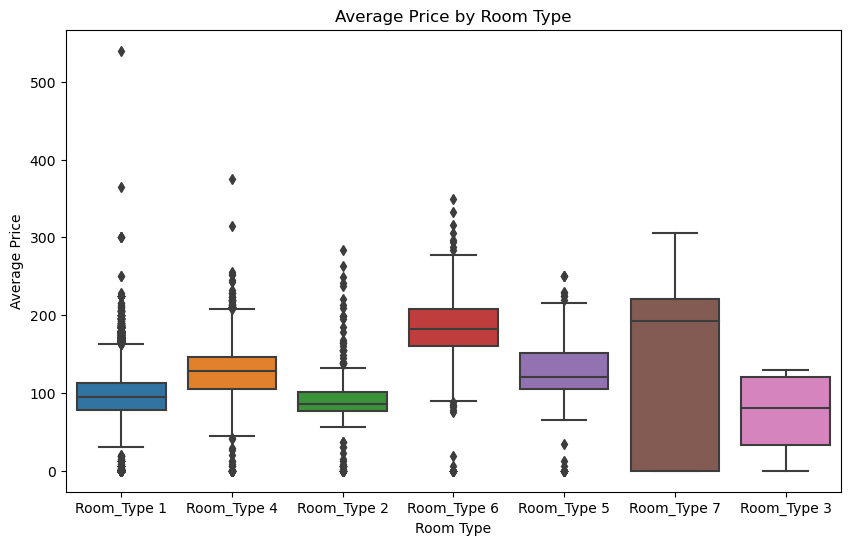

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Rename columns to ensure there are no spaces
df.rename(columns=lambda x: x.strip().replace(' ', '_').lower(), inplace=True)

# Box plot of average price by room type
plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type', y='average_price', data=df)
plt.title('Average Price by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.show()
